<a href="https://colab.research.google.com/github/GMZepeda/machine-learning-practice/blob/main/Housing_Regression_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

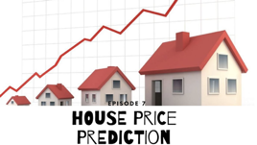

# **Acceso al dataset y Visualizacion**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Vamos a utilizar el dataset [California Housing](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

In [ ]:
#url1 = "https://raw.githubusercontent.com/subhadipml/California-Housing-Price-Prediction/master/housing.csv"
url2 = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing_df = pd.read_csv(url2)
print(housing_df.shape)
housing_df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: >

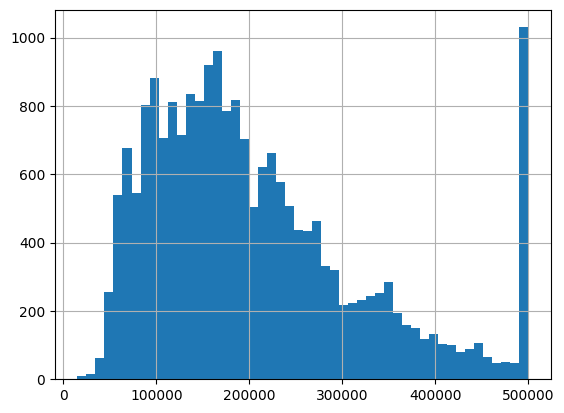

In [ ]:
housing_df['median_house_value'].hist(bins=50)

Hacemos una primera inspeccion del dataset.

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_df["ocean_proximity"].value_counts() # Esta variable es categorica (no es numerica), y queremos ver la cantidad de valores.

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing_df.drop("ocean_proximity", axis=1, inplace=True)

In [ ]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **Division en conjuntos de entrenamiento y test**

Esto es importante para realizar, luego, la evaluación del desempeño del modelo de regresion.



In [ ]:
from sklearn.model_selection import train_test_split # Validacion simple

train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=17) # Hacemos una division 80/20%

In [ ]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
18567,-121.75,36.93,24.0,4026.0,881.0,2264.0,863.0,3.1327,218100.0
19533,-120.91,37.66,36.0,1320.0,255.0,720.0,232.0,2.6523,76300.0
839,-122.06,37.60,17.0,5159.0,832.0,3174.0,817.0,5.8704,234400.0
3333,-122.62,38.92,13.0,520.0,115.0,249.0,109.0,1.8417,84700.0
12784,-121.44,38.65,28.0,1219.0,240.0,559.0,212.0,3.8295,122200.0
...,...,...,...,...,...,...,...,...,...
9529,-123.15,38.94,22.0,2163.0,436.0,1048.0,358.0,2.7171,95800.0
406,-122.27,37.90,52.0,2041.0,270.0,671.0,253.0,6.9414,417500.0
13702,-117.23,34.11,22.0,1162.0,221.0,995.0,244.0,2.5875,81300.0
2191,-120.07,36.74,19.0,2627.0,502.0,1295.0,441.0,3.0870,88200.0


In [ ]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
18403,-121.84,37.24,24.0,7991.0,1286.0,4017.0,1213.0,5.4741,238800.0
13405,-117.46,34.10,7.0,1759.0,473.0,1064.0,328.0,1.9583,108800.0
9539,-120.71,37.39,40.0,680.0,160.0,785.0,175.0,2.6058,72700.0
8668,-118.39,33.82,30.0,3433.0,918.0,1526.0,828.0,4.5817,500001.0
9019,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0
...,...,...,...,...,...,...,...,...,...
10696,-117.74,33.61,17.0,2116.0,474.0,662.0,443.0,3.5625,180800.0
20360,-118.94,34.17,16.0,3746.0,508.0,1556.0,452.0,6.3303,299400.0
10281,-117.82,33.89,21.0,3079.0,509.0,1431.0,480.0,4.0714,278900.0
7092,-118.02,33.92,34.0,1478.0,251.0,956.0,277.0,5.5238,185300.0


Visualizacion de la distribucion de la variable a predecir (median house value) de ambos datasets (para inspeccionarlo mejor)

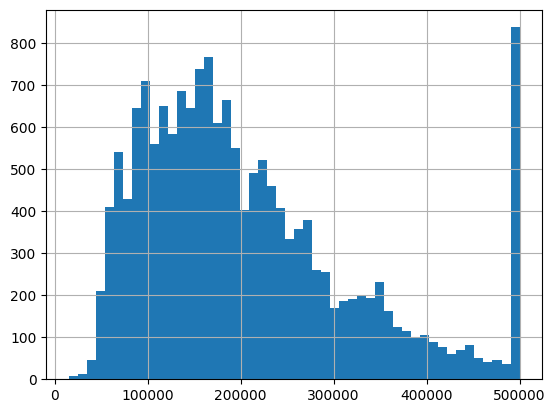

In [ ]:
train_set["median_house_value"].hist(bins=50)
plt.show()

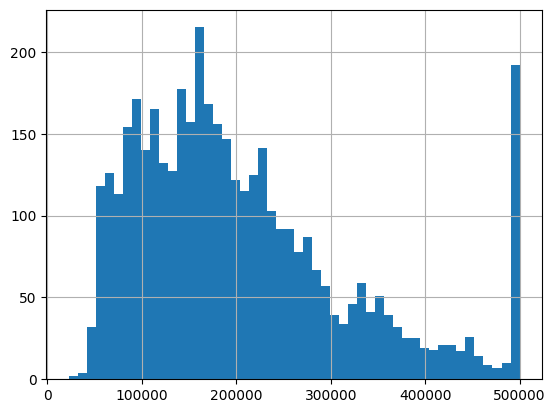

In [ ]:
test_set["median_house_value"].hist(bins=50)
plt.show()

In [ ]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
18567,-121.75,36.93,24.0,4026.0,881.0,2264.0,863.0,3.1327,218100.0
19533,-120.91,37.66,36.0,1320.0,255.0,720.0,232.0,2.6523,76300.0
839,-122.06,37.60,17.0,5159.0,832.0,3174.0,817.0,5.8704,234400.0
3333,-122.62,38.92,13.0,520.0,115.0,249.0,109.0,1.8417,84700.0
12784,-121.44,38.65,28.0,1219.0,240.0,559.0,212.0,3.8295,122200.0
...,...,...,...,...,...,...,...,...,...
9529,-123.15,38.94,22.0,2163.0,436.0,1048.0,358.0,2.7171,95800.0
406,-122.27,37.90,52.0,2041.0,270.0,671.0,253.0,6.9414,417500.0
13702,-117.23,34.11,22.0,1162.0,221.0,995.0,244.0,2.5875,81300.0
2191,-120.07,36.74,19.0,2627.0,502.0,1295.0,441.0,3.0870,88200.0


<Axes: >

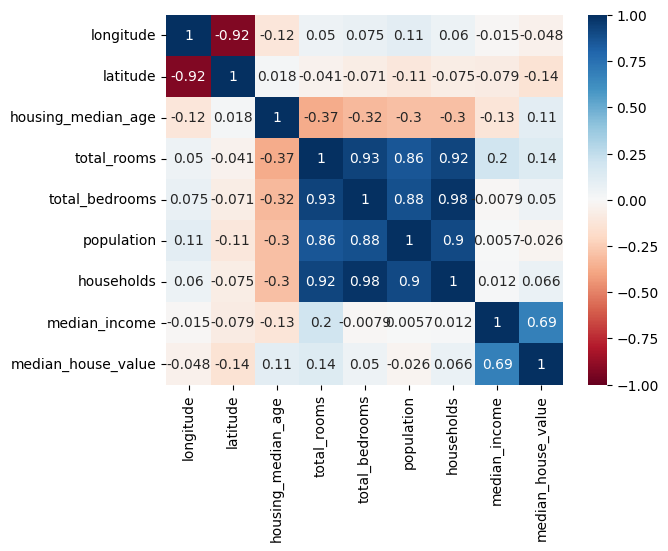

In [ ]:
import seaborn as sns

train_set_corr_df = train_set.corr()
train_set_corr_df

# Show correlation dataframe as a seaborn heatmap, using a divergent palette and max value of 1 and min value of -1
sns.heatmap(train_set_corr_df, annot=True, cmap='RdBu', vmin=-1, vmax=1)



# **Seleccion de un modelo y entrenamiento**

In [ ]:
X_train = train_set.drop(["median_house_value"], axis=1)
#X_train = X_train[['longitude', 'latitude', 'median_income']]
# Separamos los valores a predecir (Y)
y_train = train_set["median_house_value"].copy()

# X_train.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7
0,-1.086694,0.605946,-0.369155,0.647583,0.826436,0.754061,0.961989,-0.392817
1,-0.668135,0.946915,0.581950,-0.614654,-0.677778,-0.631451,-0.704221,-0.645071
2,-1.241162,0.918890,-0.923966,1.176081,0.708694,1.570652,0.840522,1.044726
3,-1.520202,1.535437,-1.241001,-0.987821,-1.014184,-1.054104,-1.029013,-1.070710
4,-0.932226,1.409325,-0.052120,-0.661767,-0.713821,-0.775925,-0.757032,-0.026933
...,...,...,...,...,...,...,...,...
16344,-1.784293,1.544779,-0.527672,-0.221429,-0.242853,-0.337119,-0.371507,-0.611045
16345,-1.345802,1.059015,1.850089,-0.278337,-0.641734,-0.675421,-0.648768,1.607098
16346,1.165554,-0.711223,-0.527672,-0.688355,-0.759477,-0.384679,-0.672534,-0.679097
16347,-0.249575,0.517201,-0.765448,-0.004993,-0.084262,-0.115473,-0.152338,-0.416814


In [ ]:
from sklearn.linear_model import LinearRegression

# Borrar NaN from X_train first
X_train = X_train.dropna(subset=["total_bedrooms"])
# X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
# lin_reg.fit(X_train_scaled, y_train)

y_pred = lin_reg.predict(X_train)
# y_pred = lin_reg.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Cómputo de R2 (sobre el conjunto de entrenamiento)

In [ ]:
r2 = r2_score(y_train, y_pred)
print("Train R2=", r2)

Train R2= 0.6392160770466221


Computo del RMSE para evaluar las predicciones (sobre el conjunto de entrenamiento)

In [ ]:
import numpy as np

lin_mse = mean_squared_error(y_train, y_pred)
print("Train RMSE=", np.sqrt(lin_mse))

Train RMSE= 69489.96933330885


Tambien se puede calcular el MAE

In [ ]:
print("Train MAE=", mean_absolute_error(y_train, y_pred))

Train MAE= 50726.77564352271


Computo del RSME y MAE sobre el conjunto de test (para ver la diferencia con el conjunto de entrenamiento)

In [ ]:
housing_prepared_test = test_set.dropna(subset=["total_bedrooms"])
X_test = housing_prepared_test.drop("median_house_value", axis=1)
# Separamos los valores a predecir (labels)
y_test = housing_prepared_test["median_house_value"]

y_pred = lin_reg.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print("Test R2=", r2)
lin_mse = mean_squared_error(y_test, y_pred)
print("Test RMSE=", np.sqrt(lin_mse))
print("Test MAE=", mean_absolute_error(y_test, y_pred))

Test R2= 0.6272966291027662
Test RMSE= 69831.24323550327
Test MAE= 50411.833755232474


Vamos a una YellowBrick para visualizar la distribución de los errores

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


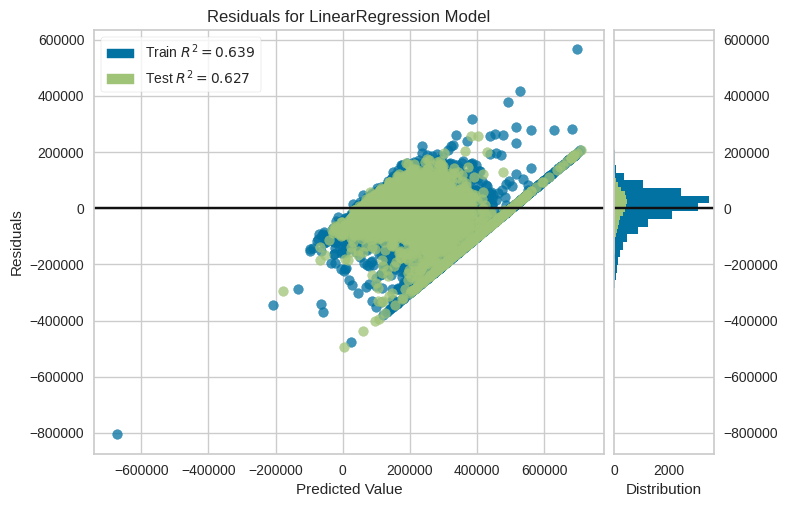

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lin_reg)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
plt.show()

La distribucion (nromal?) de los residuos tambien puede analizarse con un plot Q-Q.

Residuos - mean: 255.53008591909446 std: 69839.32659127477


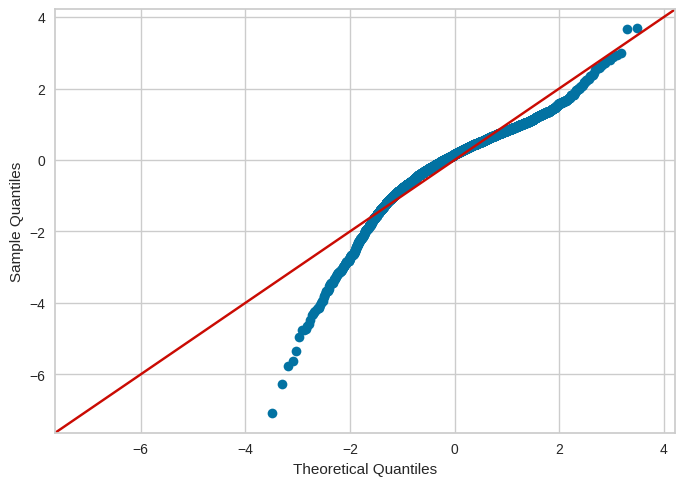

In [ ]:
import statsmodels.api as sm

X = y_pred - y_test # Residuos
print("Residuos - mean:", X.mean(), "std:", X.std())
X_normed = (X - X.mean())/(X.std()) # Normalización (estandarizacion) de la serie
sm.qqplot(X_normed, line='45')
plt.show()

# **Cross-validation**

In [ ]:
lin_reg

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

# Aplicamos el procedimiento de cross validation, usando R2 como metrica
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="r2", cv=5)

print("CV scores (R2):", lin_scores)
print("Mean:", lin_scores.mean())
print("Standard deviation:", lin_scores.std())

CV scores (R2): [0.63993514 0.6312136  0.6201621  0.64025031 0.65321857]
Mean: 0.6369559449245976
Standard deviation: 0.010947230821048915


Para determinar cual modelo tiene mejor performance, los valores promedio de cross-validation pueden ser engañosos.
Una opción mas solida es evaluar la distribucion de los scores.

Si tuvieramos varios modelos, puede tambien analizarse si las diferencias entre las medias de los modelos son reales en terminos de significancia estadistica.

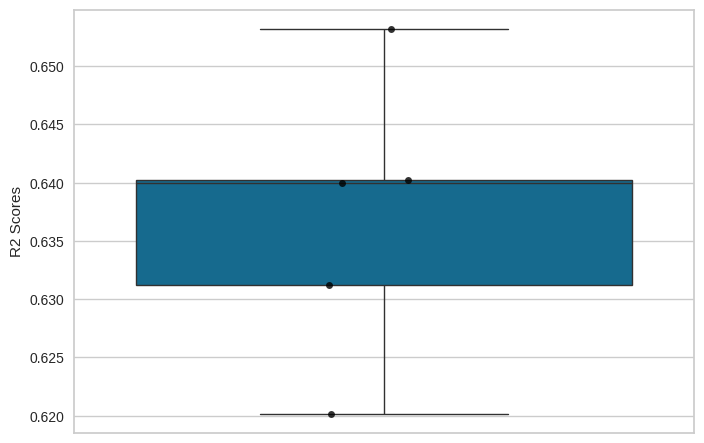

In [ ]:
import seaborn as sns

data = pd.DataFrame(lin_scores, columns=['R2 Scores'])
boxplot = sns.boxplot(y="R2 Scores", data=data)
boxplot = sns.stripplot(y="R2 Scores", data=data, marker="o", alpha=0.8, color="black")

---

In [ ]:
lin_reg.coef_

array([-86071.07133472, -91305.09477814,  15100.88193332, -17407.15012539,
        47333.56652335, -42952.58295143,  17971.23146376,  76817.2604653 ])

In [ ]:
cdf = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficients'])
cdf

,Coefficients
longitude,-86071.071335
latitude,-91305.094778
housing_median_age,15100.881933
total_rooms,-17407.150125
total_bedrooms,47333.566523
population,-42952.582951
households,17971.231464
median_income,76817.260465
